In [2]:
library(Seurat)
library(tidyverse)
library(Matrix)
library(scales)
library(cowplot)
library(RCurl)

Attaching SeuratObject

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘RCurl’


The following object is masked 

In [38]:
# read in data, including all complexity
path <- "SeuratOut/integrated-allcomplexity-clustered.rds"
data <- readRDS(path)

In [29]:
# read in data, excluding low complexity cells
path <- "SeuratOut/seurat_filtered_highComplexity.rds"
data <- readRDS(path)

In [30]:
head(data)

,orig.ident,nCount_RNA,nFeature_RNA,nCount_CMO,nFeature_CMO,log10GenesPerUMI,mitoRatio
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
AAACCCACAAGTGATA-1_1,Age3_SV_20C1,3944,1632,5291,10,0.8934306,0.037525355
AAACGAAGTAGGATAT-1_1,Age3_SV_20C1,1608,739,532,10,0.8946939,0.020522388
AAACGCTCAACCGCCA-1_1,Age3_SV_20C1,3623,1622,834,10,0.9019357,0.017112890
AAAGGTAGTTGCCGAC-1_1,Age3_SV_20C1,2486,928,476,10,0.8739647,0.026950925
AAATGGAAGTATCTGC-1_1,Age3_SV_20C1,5679,1467,1885,10,0.8434206,0.015143511
AACAAGATCCCTCAAC-1_1,Age3_SV_20C1,878,470,4398,10,0.9077978,0.027334852
AACAGGGTCCTTCTTC-1_1,Age3_SV_20C1,2323,840,578,10,0.8687571,0.004304778
AACCAACCATATACCG-1_1,Age3_SV_20C1,16406,3581,3733,10,0.8431796,0.014994514
AACCATGAGAGAGTTT-1_1,Age3_SV_20C1,2517,949,777,10,0.8754391,0.031386571


In [33]:
## Takes a while!!
# Or SCTransform (regularized negative binomial regression, since more nUMI, larger variances)
split_ob <- SplitObject(data,split.by='orig.ident')
for (i in 1:length(split_ob)){
    split_ob[[i]] <- NormalizeData(split_ob[[i]],verbose=TRUE)
    split_ob[[i]] <- SCTransform(split_ob[[i]],vars.to.regress=c('mitoRatio'))
}

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 10822 by 283

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 283 cells



  |======================================================================| 100%


There are 1 estimated thetas smaller than 1e-07 - will be set to 1e-07

Found 55 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 10822 genes



  |======================================================================| 100%


Computing corrected count matrix for 10822 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 4.451324 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 13121 by 587

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 587 cells



  |======================================================================| 100%


Found 97 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 13121 genes



  |======================================================================| 100%


Computing corrected count matrix for 13121 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 8.24614 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 10003 by 252

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 252 cells



  |======================================================================| 100%


Found 83 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 10003 genes



  |======================================================================| 100%


Computing corrected count matrix for 10003 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 3.676969 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 12050 by 361

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 361 cells



  |======================================================================| 100%


Found 99 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 12050 genes



  |======================================================================| 100%


Computing corrected count matrix for 12050 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 5.287128 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 12289 by 487

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 487 cells



  |======================================================================| 100%


Found 45 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 12289 genes



  |======================================================================| 100%


Computing corrected count matrix for 12289 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 6.573887 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 12453 by 806

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 806 cells



  |======================================================================| 100%


Found 79 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 12453 genes



  |======================================================================| 100%


Computing corrected count matrix for 12453 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 10.19502 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 12412 by 449

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 449 cells



  |======================================================================| 100%


There are 1 estimated thetas smaller than 1e-07 - will be set to 1e-07

Found 96 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 12412 genes



  |======================================================================| 100%


Computing corrected count matrix for 12412 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 6.143414 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 12280 by 472

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 472 cells



  |======================================================================| 100%


Found 102 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 12280 genes



  |======================================================================| 100%


Computing corrected count matrix for 12280 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 6.158227 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 11423 by 336

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 336 cells



  |======================================================================| 100%


Found 72 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 11423 genes



  |======================================================================| 100%


Computing corrected count matrix for 11423 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 4.749104 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 13014 by 555

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 555 cells



  |======================================================================| 100%


Found 103 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 13014 genes



  |======================================================================| 100%


Computing corrected count matrix for 13014 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 7.113292 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 13537 by 1101

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 1101 cells



  |======================================================================| 100%


Found 132 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 13537 genes



  |======================================================================| 100%


Computing corrected count matrix for 13537 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 13.68203 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 12976 by 710

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 710 cells



  |======================================================================| 100%


Found 97 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 12976 genes



  |======================================================================| 100%


Computing corrected count matrix for 12976 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 8.50944 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 13328 by 1019

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 1019 cells



  |======================================================================| 100%


Found 116 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 13328 genes



  |======================================================================| 100%


Computing corrected count matrix for 13328 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 11.44478 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 8296 by 168

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 168 cells



  |======================================================================| 100%


Found 96 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 8296 genes



  |======================================================================| 100%


Computing corrected count matrix for 8296 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 2.621375 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 12745 by 801

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 801 cells



  |======================================================================| 100%


Found 92 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 12745 genes



  |======================================================================| 100%


Computing corrected count matrix for 12745 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 9.435768 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 11486 by 445

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 445 cells



  |======================================================================| 100%


Found 78 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 11486 genes



  |======================================================================| 100%


Computing corrected count matrix for 11486 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 5.915434 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 11014 by 387

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 387 cells



  |======================================================================| 100%


Found 89 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 11014 genes



  |======================================================================| 100%


Computing corrected count matrix for 11014 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 5.235255 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 11976 by 624

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 624 cells



  |======================================================================| 100%


Found 116 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 11976 genes



  |======================================================================| 100%


Computing corrected count matrix for 11976 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 7.744243 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 16774 by 9724

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |======================================================================| 100%


Found 152 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 16774 genes



  |======================================================================| 100%


Computing corrected count matrix for 16774 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 2.183455 mins

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 16894 by 10686

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |======================================================================| 100%


Found 154 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 16894 genes



  |======================================================================| 100%


Computing corrected count matrix for 16894 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 2.144414 mins

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 12025 by 2354

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 2354 cells



  |======================================================================| 100%


Found 168 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 12025 genes



  |======================================================================| 100%


Computing corrected count matrix for 12025 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 25.54672 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 11957 by 2482

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 2482 cells



  |======================================================================| 100%


Found 166 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 11957 genes



  |======================================================================| 100%


Computing corrected count matrix for 11957 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 26.04534 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 11489 by 2163

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 2163 cells



  |======================================================================| 100%


Found 188 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 11489 genes



  |======================================================================| 100%


Computing corrected count matrix for 11489 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 22.89367 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT



In [ ]:
## Takes a while!!
# using SCTransformed objects as input, perform integration across samples
# CCA (canonical correlation analysis)
    # like PCA, find the most variation but only if shared across all samples/groups
Top2000Features <- SelectIntegrationFeatures(object.list=split_ob,nfeatures=2000)
split_ob <- PrepSCTIntegration(object.list=split_ob,anchor.features=Top2000Features)
# identify anchors, or mutual nearest neighbors (MNNs) across samples 'best buddies'
    # best buddies in reciproal analysis will be used as anchors to 'merge' two groups 
    # filter anchors by overlapping their neighborhood cells (-> if good anchors, their neighborhood cells should be similar too)
anchors <- FindIntegrationAnchors(object.list=split_ob,normalization.method='SCT',anchor.features=Top2000Features)
# cell types only present in one sample will remain sample-specific!
data <- IntegrateData(anchorset = anchors, normalization.method='SCT')

Warning message:
“Not all features provided are in this Assay object, removing the following feature(s): Angptl7, Selp, Fabp4, Ctgf, Sva, Ccl21a, Rgs5, Cyr61, Ccr7, A630095E13Rik, Ackr1, Spink1, 9530003J23Rik, Tac1, Tgm4, Stc1, Svs3b, 8430408G22Rik, Clcn5, Mmrn1, Pbsn, Lyve1, Ube2c, Slpi, D730048I06Rik, Svs1, Rnase1, Mcpt4, Birc5, 9530002B09Rik, Svs3a, Cnn1, Gal, Hdc, Hamp, Atp6v1g3, Actg2, Myoc, Sele, Defb50, Tnfrsf4, Sst, Tpsb2, Cpa3, Mmp7, Acta1, Cma1, Gm37223, Wfdc12, Npy, Krt16, Col6a5, Tpsab1, Inhba, Ccl8, Chad, Scn7a, C1qtnf3, Saa3, 4930469K13Rik, Nefh, Aqp3, Reln, Calca, Pi16, C7, Thbs4, Il11, Isl1, Hba-a1, Cma2, Agr2, Rgs4, Mki67, Mmp12, Cd209a, Cxcl9, Olr1, Il17b, Cldn5, Hbb-bs, Tmem252, Trdc, Sla, Cck, Fgfbp1, Ankrd1, Cd300lg, Cyp4b1, Tnmd, Rbp4, Ucn2, Clec4e, Atp6v1c2, Tnfsf8, Nusap1, Il4i1, Sult1e1, Cilp, 1500015O10Rik, Prox1, Pclaf, C2cd4b, Cxcl3, 4930539E08Rik, Calml3, Aldh2, Cdkn3, Agrp, Gpr82, Ngf, Ifng, Kcne3, Cd5, Atp6v0d2, Ifit3, Ccr1, Sprr2f, Wisp2, Pdcd1, Itgbl1, 

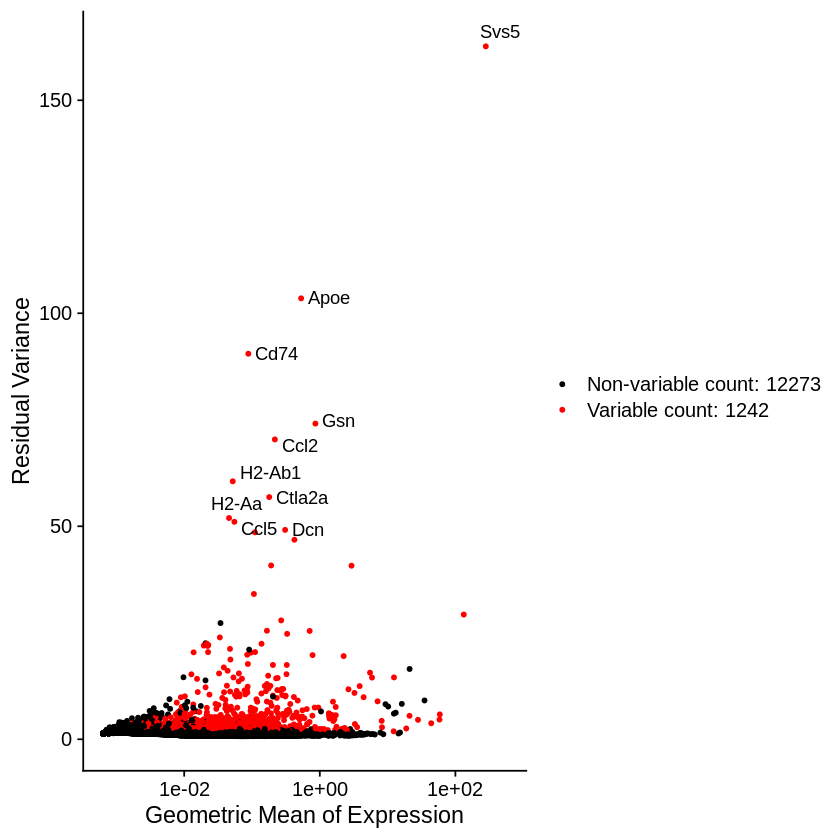

In [39]:
data <- FindVariableFeatures(data, selection.method='vst',nfeatures=2000)
top10 <- head(VariableFeatures(data),10)

plot1 <- VariableFeaturePlot(data)
plot2 <- LabelPoints(plot=plot1,points=top10,repel=TRUE)

plot2
# 2000 looks like a good cutoff?

In [ ]:
data <- ScaleData(data,features=rownames(data))
data <- RunPCA(data,features=VariableFeatures(object=data))

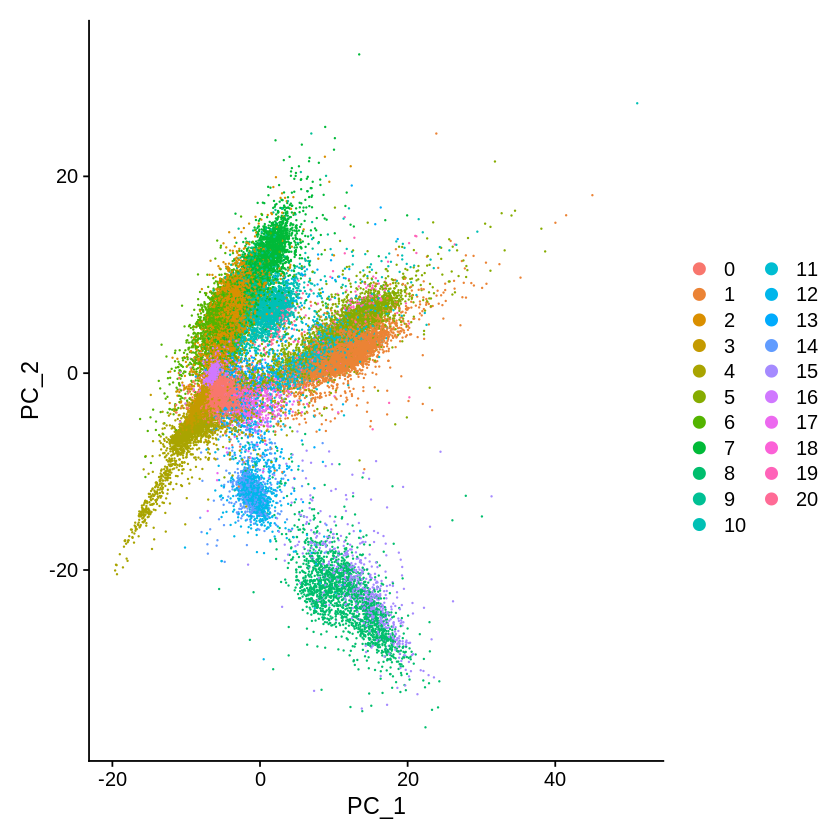

In [41]:
# DimPlot(data, reduction='pca')
DimPlot(data, reduction='pca')

In [ ]:
# choose num PC
# only works for untransformed data
#data <- JackStraw(data, num.replicate=100)
#data <- ScoreJackStraw(data,dims=1:20)
#JackStrawPlot(data,dims=1:15)

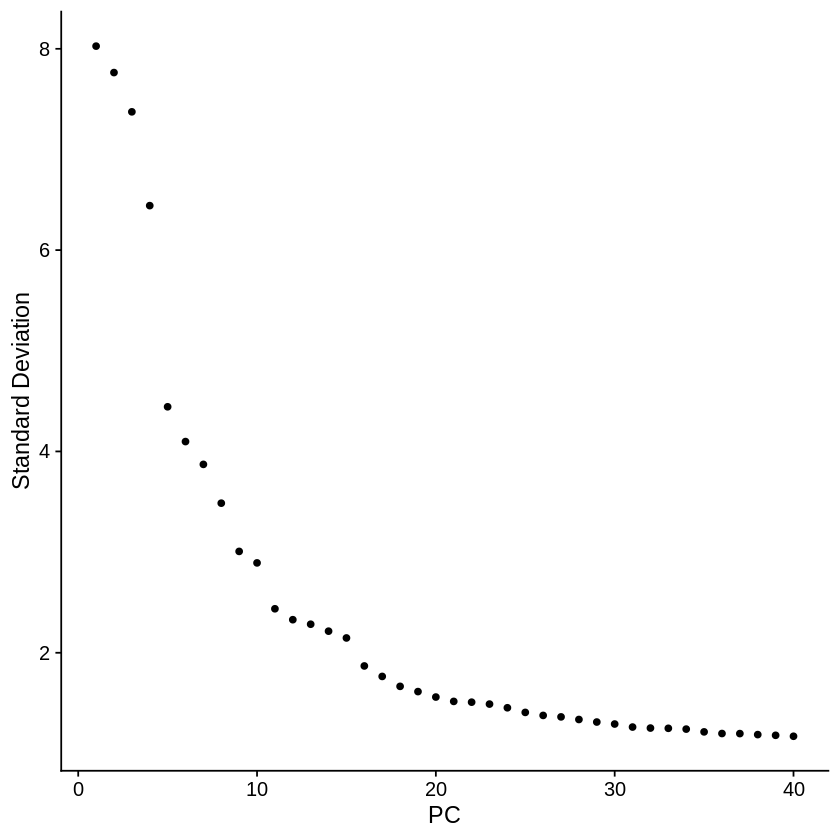

In [42]:
ElbowPlot(data,ndim=40)

In [ ]:
# cluster the cells
data <- FindNeighbors(data, dims=1:30)
data <- FindClusters(data, resolution=0.5)

In [50]:
# visualize in UMAP
data <- RunUMAP(data, dims=1:30,n.neighbors=30,min.dist=0.2)

20:37:25 UMAP embedding parameters a = 1.262 b = 1.003

20:37:25 Read 47804 rows and found 30 numeric columns

20:37:25 Using Annoy for neighbor search, n_neighbors = 30

20:37:25 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:37:32 Writing NN index file to temp file /tmp/RtmpflpmpV/file21504d1e89393a

20:37:32 Searching Annoy index using 1 thread, search_k = 3000

20:37:46 Annoy recall = 100%

20:37:47 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

20:37:49 Initializing from normalized Laplacian + noise (using irlba)

20:38:02 Commencing optimization for 200 epochs, with 2354006 positive edges

20:38:31 Optimization finished



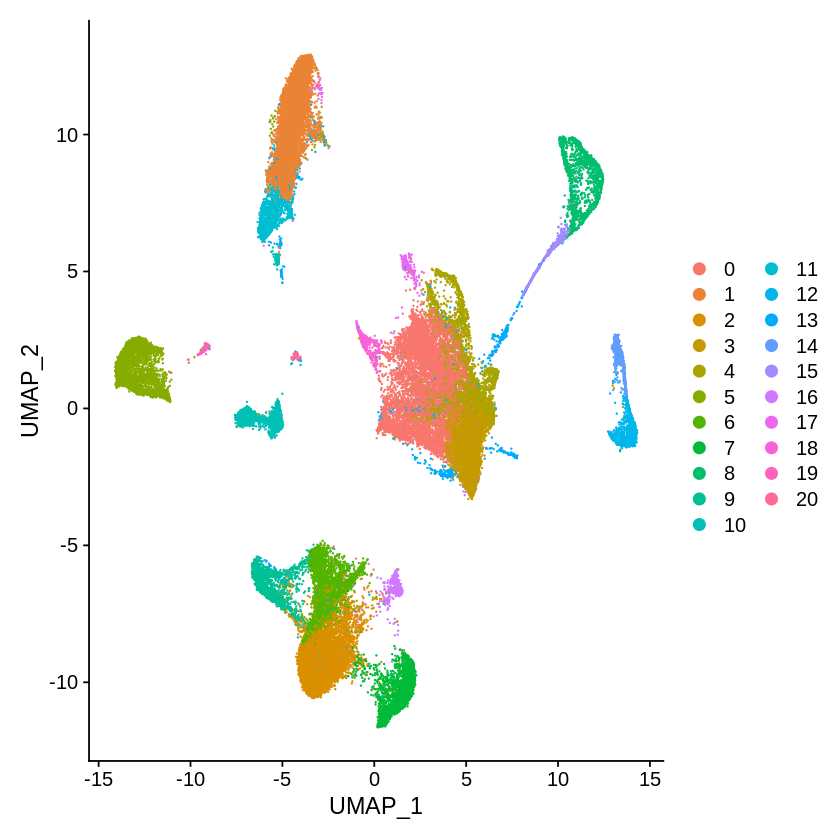

In [51]:
DimPlot(data, reduction='umap')

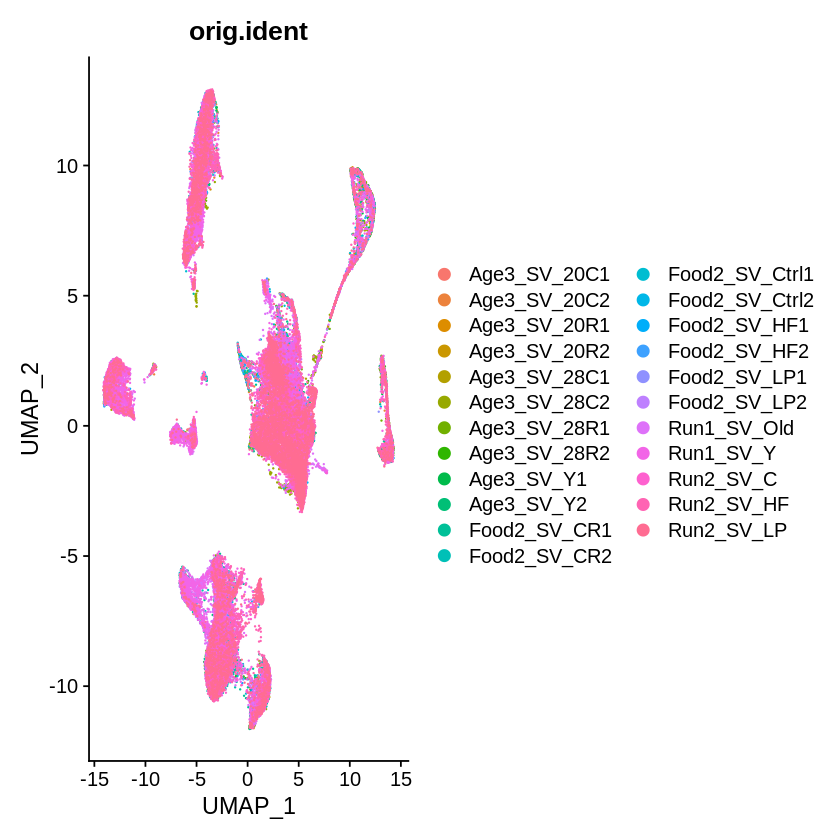

In [52]:
# colored by samples
DimPlot(data,reduction='umap',group.by='orig.ident')

In [ ]:
ob.list <- SplitObject(data, split.by = "orig.ident")
plot.list <- lapply(X = ob.list, FUN = function(x) {
    DimPlot(x, reduction = "umap", label = FALSE, label.size = 4) + ggtitle(names(ob.list[1]))
})

In [ ]:
plot.list

In [53]:
df <- prop.table(table(data@meta.data$orig.ident,data@meta.data$seurat_clusters),margin=1)*100

Warning message in heatmap.2(df, Colv = NA, Rowv = NA, trace = "none", breaks = breaks, :
“Discrepancy: Rowv is FALSE, while dendrogram is `both'. Omitting row dendogram.”
Warning message in heatmap.2(df, Colv = NA, Rowv = NA, trace = "none", breaks = breaks, :
“Discrepancy: Colv is FALSE, while dendrogram is `column'. Omitting column dendogram.”


null device 
          1

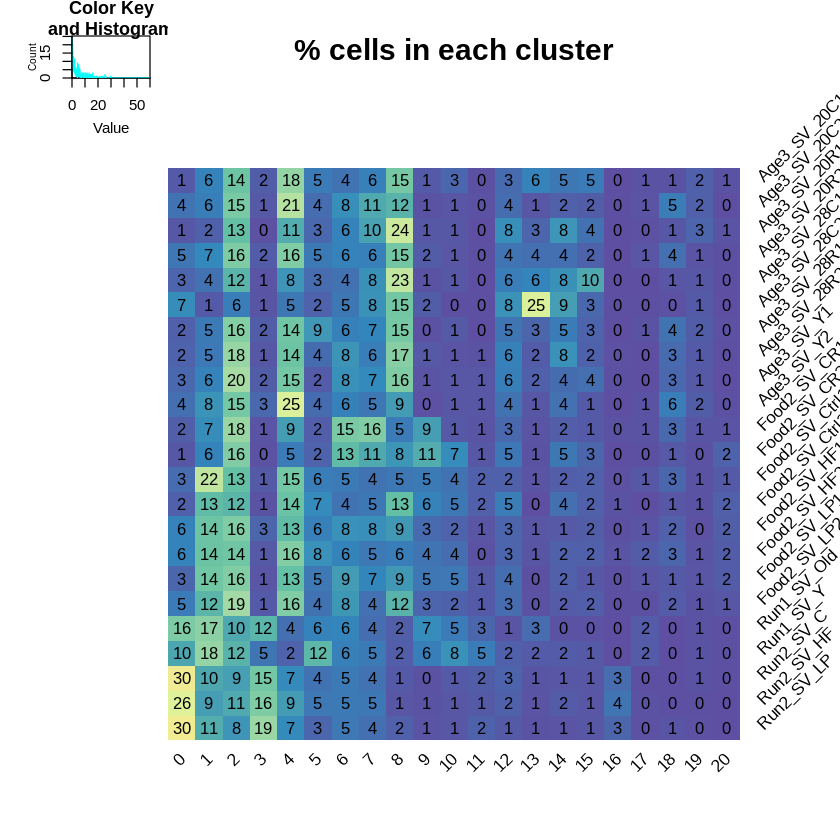

In [54]:
library(gplots)
library(RColorBrewer)
breaks <- seq(0,60,0.1)
colors <- brewer.pal(10,"Spectral")
colors <- colorRampPalette(colors)(length(breaks)-1)
heatmap.2(df,Colv=NA,Rowv=NA,trace="none",breaks=breaks,col=rev(colors),cellnote=round(df,digits=0),notecol='black',cexRow=1,cexCol=1,keysize=1,srtCol=45,srtRow=45,main="% cells in each cluster")
dev.off()

In [ ]:
output <- "SeuratOut/integrated-allcomplexity-clustered.rds"
saveRDS(data,file=output)